# Step 1 - Importing libraries and CSV files

In [1]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import flight_project_functions as bpf

**This CSV file contains information on 1 million flights that occurred between April and August 2022.**

In [2]:
df = bpf.uploading_flight_data()
df

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1279.0,USD,1320000.0,1320000.0,0%,2022-04-29 17:52:59
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1279.0,USD,1195000.0,1320000.0,-9%,2022-04-29 17:52:59
2,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,1530,3,1284.0,USD,1248000.0,1320000.0,-5%,2022-04-29 17:52:59
3,ALG,Algeria,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1290.0,USD,1347000.0,1320000.0,2%,2022-04-29 17:52:59
4,ALG,Algeria,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],LH1317|LH1317|LH1317,2022-04-30 12:35:00,2022-05-01 10:15:00,1540,2,1347.0,USD,1381000.0,1320000.0,4%,2022-04-29 17:52:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998861,BOM,India,SYD,Australia,Boeing 777|Airbus A380,EK,[Emirates],EK503|EK503,2022-05-01 19:20:00,2022-05-02 22:05:00,1335,1,1317.0,USD,1567000.0,1133000.0,38%,2022-04-29 17:52:59
998862,BOM,India,SYD,Australia,Boeing 777|Airbus A380,EK,[Emirates],EK509|EK509,2022-05-01 22:20:00,2022-05-02 22:05:00,1155,1,1317.0,USD,1583000.0,1133000.0,39%,2022-04-29 17:52:59
998863,BOM,India,SYD,Australia,Airbus A350|Boeing 787|Boeing 737,multi,[Etihad| Virgin Australia],EY205|EY205|EY205,2022-05-01 04:35:00,2022-05-02 09:55:00,1490,2,1328.0,USD,1354000.0,1133000.0,19%,2022-04-29 17:52:59
998864,BOM,India,SYD,Australia,Airbus A321 (Sharklets)|Airbus A321|Airbus A330,multi,[Air India| SriLankan],AI603|AI603|AI603,2022-05-01 06:10:00,2022-05-02 14:55:00,1695,2,1368.0,USD,1099000.0,1133000.0,-2%,2022-04-29 17:52:59


**This CSV document entitled 'Airport Code Dataframe' lists airport codes and their corresponding cities.**

In [3]:
df_airport_codes = bpf.uploading_airport_code_data()
df_airport_codes

,index,Airport Name,City,Country,three-digit code,four_digit,l1,l2
0,0,Forestville Airport,Forestville,Canada,NaN,CYFE,48.746101,-69.097198
1,1,Pitt Meadows Airport,Pitt Meadows,Canada,NaN,CYPK,49.216099,-122.709999
2,2,Blida Airport,Blida,Algeria,NaN,DAAB,36.503601,2.814170
3,3,Bou Saada Airport,Bou Saada,Algeria,NaN,DAAD,35.332500,4.206390
4,4,Reggane Airport,Reggan,Algeria,NaN,DAAN,26.710100,0.285647
...,...,...,...,...,...,...,...,...
7179,7179,Zunyi Xinzhou Airport,Zunyi,China,ZYI,ZUZY,27.589500,107.000700
7180,7180,Osmany International Airport,Sylhet Osmani,Bangladesh,ZYL,VGSY,24.963200,91.866798
7181,7181,Mzuzu Airport,Mzuzu,Malawi,ZZU,FWUU,-11.444700,34.011799
7182,7182,Zanesville Municipal Airport,Zanesville,United States,ZZV,KZZV,39.944401,-81.892097


# Step 2 - Merging the two data frames

**2.1 Merging the columns 'city' and 'three-digit code' from the Airport Codes Dataframe into the main dataframe. All other columns will be dropped.** **2.2 Merging the two dataframes to display the city corresponding to each airport code.**

In [4]:
merged_df = bpf.add_city_columns(df, df_airport_codes)
merged_df

,from_airport_code,city_of_departure,from_country,city_of_arrival,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,ALG,Algier,Algeria,Buenos Aires,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1279.0,USD,1320000.0,1320000.0,0%,2022-04-29 17:52:59
1,ALG,Algier,Algeria,Buenos Aires,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1279.0,USD,1195000.0,1320000.0,-9%,2022-04-29 17:52:59
2,ALG,Algier,Algeria,Buenos Aires,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,1530,3,1284.0,USD,1248000.0,1320000.0,-5%,2022-04-29 17:52:59
3,ALG,Algier,Algeria,Buenos Aires,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1290.0,USD,1347000.0,1320000.0,2%,2022-04-29 17:52:59
4,ALG,Algier,Algeria,Buenos Aires,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],LH1317|LH1317|LH1317,2022-04-30 12:35:00,2022-05-01 10:15:00,1540,2,1347.0,USD,1381000.0,1320000.0,4%,2022-04-29 17:52:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998861,BOM,Mumbai,India,Sydney,SYD,Australia,Boeing 777|Airbus A380,EK,[Emirates],EK503|EK503,2022-05-01 19:20:00,2022-05-02 22:05:00,1335,1,1317.0,USD,1567000.0,1133000.0,38%,2022-04-29 17:52:59
998862,BOM,Mumbai,India,Sydney,SYD,Australia,Boeing 777|Airbus A380,EK,[Emirates],EK509|EK509,2022-05-01 22:20:00,2022-05-02 22:05:00,1155,1,1317.0,USD,1583000.0,1133000.0,39%,2022-04-29 17:52:59
998863,BOM,Mumbai,India,Sydney,SYD,Australia,Airbus A350|Boeing 787|Boeing 737,multi,[Etihad| Virgin Australia],EY205|EY205|EY205,2022-05-01 04:35:00,2022-05-02 09:55:00,1490,2,1328.0,USD,1354000.0,1133000.0,19%,2022-04-29 17:52:59
998864,BOM,Mumbai,India,Sydney,SYD,Australia,Airbus A321 (Sharklets)|Airbus A321|Airbus A330,multi,[Air India| SriLankan],AI603|AI603|AI603,2022-05-01 06:10:00,2022-05-02 14:55:00,1695,2,1368.0,USD,1099000.0,1133000.0,-2%,2022-04-29 17:52:59


In [5]:
merged_df.isnull().sum()

from_airport_code                      0
city_of_departure                      0
from_country                           0
city_of_arrival                    11874
dest_airport_code                      0
dest_country                           0
aircraft_type                      13914
airline_number                         0
airline_name                           0
flight_number                          0
departure_time                         0
arrival_time                           0
duration                               0
stops                                  0
price                               1353
currency                               0
co2_emissions                       4868
avg_co2_emission_for_this_route    88402
co2_percentage                     88402
scan_date                              0
dtype: int64

# Step 3 - Cleaning the data

**3.1 The first step is to drop all rows (flights) that include layovers. This crucial step prevents any distortions in the analysis of flight duration, as time spent during layovers prevents an accurate assessment of actual flying time. Moreover, when layovers are involved, the table only shows the aircraft used without specifying the distance each aircraft traveled. This lack of detailed information makes it very difficult to accurately determine the pollution levels of each type of aircraft. By excluding layovers, we ensure that we can more easily and precisely analyze the emissions and performance of individual aircraft types.** **3.2 Renaming the duration column to indicate it is measured in minutes.** **3.3 Eliminating all rows that do not provide information about CO2 emissions, as this data is crucial for the analysis.** **3.4 Filling null values in avg_co2_emission_for_this_route and co2_percentage.** **3.5 The Airport Code dataframe did not include the airport code for Doha (DOH), so we inserted it manually. This is straightforward because the only null values in the city of arrival column pertain to Doha (DOH).**

In [6]:
clean_df = bpf.clean_flight_data(merged_df)
clean_df

/Users/pepdemartiolius/Documents/GitHub/big-project-number-1/flight_project_functions.py:152: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_co2_emission_for_this_route'].fillna(df['avg_co2_emission_for_this_route_new'], inplace=True)
/Users/pepdemartiolius/Documents/GitHub/big-project-number-1/flight_project_functions.py:161: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will n

,from_airport_code,city_of_departure,from_country,city_of_arrival,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration_minutes,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,ALG,Algier,Algeria,Cairo,CAI,Egypt,Boeing 737,MS,[EgyptAir],MS846,2022-05-29 12:55:00,2022-05-29 17:30:00,215,0,350.0,USD,327000.0,454000.0,-27.973568,2022-04-29 17:52:59
1,ALG,Algier,Algeria,Paris,CDG,France,Boeing 737,5O,[ASL Airlines],5O162,2022-04-30 10:20:00,2022-04-30 13:40:00,140,0,97.0,USD,210000.0,186000.0,12.903226,2022-04-29 17:52:59
2,ALG,Algier,Algeria,Cairo,CAI,Egypt,Boeing 737,MS,[EgyptAir],MS846,2022-07-28 12:55:00,2022-07-28 17:30:00,215,0,350.0,USD,327000.0,454000.0,-27.973568,2022-04-29 17:52:59
3,ALG,Algier,Algeria,Paris,CDG,France,Boeing 737,5O,[ASL Airlines],5O162,2022-05-02 10:20:00,2022-05-02 13:40:00,140,0,202.0,USD,186000.0,186000.0,0.000000,2022-04-29 17:52:59
4,ALG,Algier,Algeria,Paris,CDG,France,Boeing 737,5O,[ASL Airlines],5O272,2022-05-02 17:00:00,2022-05-02 20:20:00,140,0,230.0,USD,186000.0,186000.0,0.000000,2022-04-29 17:52:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228,BOM,Mumbai,India,Bangkok,BKK,Thailand,Airbus A350,TG,[THAI],TG318,2022-05-01 23:35:00,2022-05-02 05:35:00,270,0,221.0,USD,263000.0,340000.0,-22.647059,2022-04-29 17:52:59
16229,BOM,Mumbai,India,Bangkok,BKK,Thailand,Airbus A320,G8,[GO FIRST],G825,2022-05-03 05:50:00,2022-05-03 12:00:00,280,0,110.0,USD,300000.0,340000.0,-11.764706,2022-04-29 17:52:59
16230,BOM,Mumbai,India,Bangkok,BKK,Thailand,Boeing 777,TG,[THAI],TG318,2022-05-03 23:35:00,2022-05-04 05:35:00,270,0,191.0,USD,373000.0,340000.0,9.705882,2022-04-29 17:52:59
16231,BOM,Mumbai,India,Bangkok,BKK,Thailand,Airbus A320,G8,[GO FIRST],G825,2022-05-07 05:50:00,2022-05-07 12:00:00,280,0,145.0,USD,300000.0,340000.0,-11.764706,2022-04-29 17:52:59


In [7]:
clean_df.isnull().sum()

from_airport_code                    0
city_of_departure                    0
from_country                         0
city_of_arrival                      0
dest_airport_code                    0
dest_country                         0
aircraft_type                      224
airline_number                       0
airline_name                         0
flight_number                        0
departure_time                       0
arrival_time                         0
duration_minutes                     0
stops                                0
price                              847
currency                             0
co2_emissions                        0
avg_co2_emission_for_this_route      0
co2_percentage                       0
scan_date                            0
dtype: int64

## Step 4 - Hypothesis

1. Most Pollutant Routes in Summer 2022
Analysis: Calculate the total CO2 emissions for each route.
Approach: Sum CO2 emissions for all flights on each route, then rank them to find the most polluting routes.

In [8]:
bpf.most_pollutant_routes(clean_df)

,city_of_departure,city_of_arrival,co2_emissions
341,Mumbai,Delhi,51553000.0
205,Delhi,Mumbai,51475000.0
336,Melbourne,Sydney,47924000.0
194,Delhi,Bangalore,47835000.0
512,Sydney,Melbourne,47484000.0
78,Bogota,Madrid,42822000.0
483,Shanghai,Shenzhen,35626000.0
413,Paris,New York,35385000.0
515,Sydney,Singapore,33654000.0
478,Shanghai,Guangzhou,31306000.0


2. Most Polluting Aircraft Types
Analysis: Determine CO2 emissions by aircraft type.
Approach: Aggregate CO2 emissions by aircraft type and identify which types have the highest emissions.

In [9]:
bpf.most_polluting_aircraft_types(clean_df)

,aircraft_type,co2_emissions
22,Boeing 777,643467000.0
23,Boeing 787,614378000.0
5,Airbus A320,561207000.0
16,Boeing 737,468573000.0
10,Airbus A330,302245000.0
7,Airbus A321,270180000.0
13,Airbus A350,254449000.0
4,Airbus A319,134919000.0
14,Airbus A380,122657000.0
9,Airbus A321neo,110204000.0


3. CO2 Emissions by Airline Analysis: Compare the CO2 emissions of different airlines. Approach: Aggregate CO2 emissions data by airline and analyze their relative environmental impact.

In [10]:
bpf.co2_emissions_by_airline(clean_df)

           airline_name  co2_emissions
62          [Lufthansa]    379861000.0
13         [Air France]    292242000.0
9          [Air Canada]    197230000.0
14          [Air India]    144710000.0
34     [China Southern]    142771000.0
..                  ...            ...
103           [Vueling]       616000.0
45   [Garuda Indonesia]       571000.0
66           [Nile Air]       554000.0
87              [Swoop]       260000.0
94        [Uni Airways]       214000.0

[113 rows x 2 columns]


,airline_name,co2_emissions
62,[Lufthansa],379861000.0
13,[Air France],292242000.0
9,[Air Canada],197230000.0
14,[Air India],144710000.0
34,[China Southern],142771000.0
...,...,...
103,[Vueling],616000.0
45,[Garuda Indonesia],571000.0
66,[Nile Air],554000.0
87,[Swoop],260000.0


4. CO2 Emissions by Airport

Analysis: Assess the total CO2 emissions associated with each airport.
Approach: Sum the CO2 emissions for all departures and arrivals at each airport.

/Users/pepdemartiolius/Documents/GitHub/big-project-number-1/flight_project_functions.py:476: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




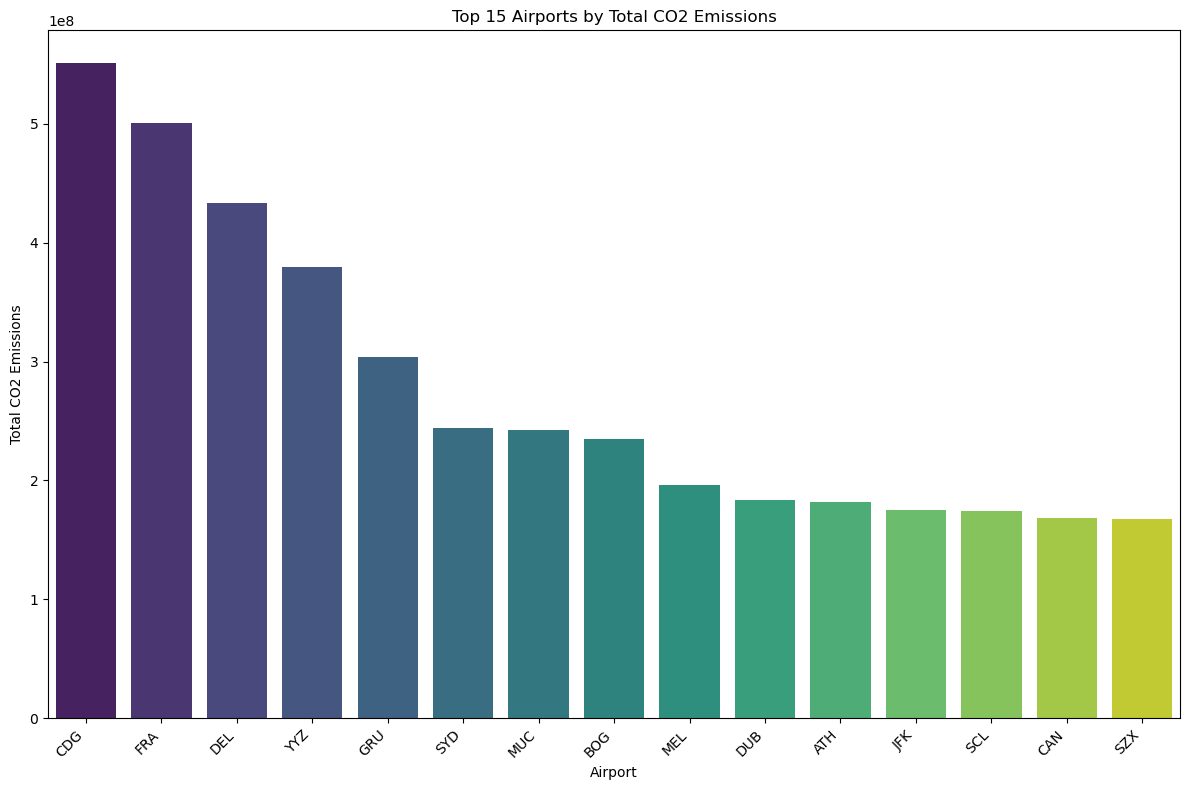

,airport,co2_emissions
14,CDG,551089000.0
30,FRA,500359000.0
23,DEL,433581000.0
75,YYZ,379260000.0
31,GRU,304102000.0
69,SYD,244416000.0
52,MUC,242517000.0
9,BOG,234781000.0
48,MEL,196473000.0
26,DUB,183520000.0


In [11]:
bpf.co2_emissions_by_airport(clean_df)

5. Most Popular Routes
Analysis: Identify routes with the highest number of flights.
Approach: Count the number of flights for each route and rank them.

In [12]:
bpf.most_popular_routes(clean_df)

,from_airport_code,dest_airport_code,num_flights
429,MEL,SYD,488
533,SYD,MEL,485
82,BOM,DEL,364
275,DEL,BOM,364
274,DEL,BLR,252
520,SHA,PEK,177
521,SHA,SZX,175
415,HGH,SZX,167
516,SHA,CAN,165
407,HGH,CAN,157


6. Shortest and Longest Routes
Analysis: Find the routes with the minimum and maximum distances.
Approach: Use the distance data to identify the shortest and longest routes.

<Figure size 1000x600 with 0 Axes>

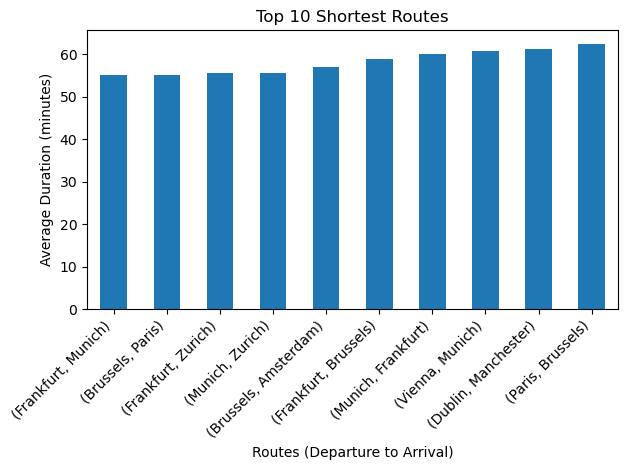

<Figure size 1000x600 with 0 Axes>

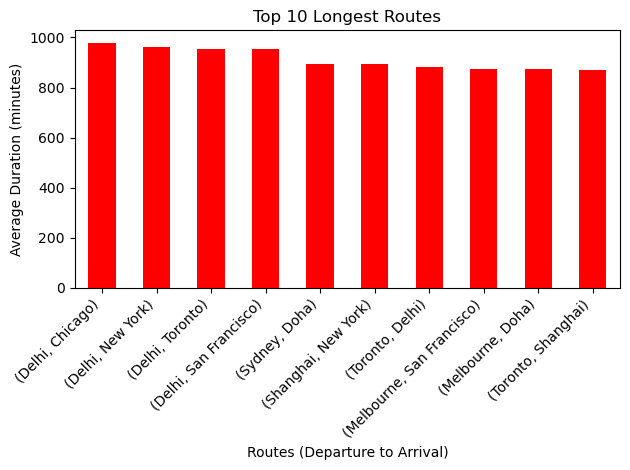

(                                   duration_minutes
 city_of_departure city_of_arrival                  
 Frankfurt         Munich                  55.000000
 Brussels          Paris                   55.000000
 Frankfurt         Zurich                  55.593220
 Munich            Zurich                  55.595238
 Brussels          Amsterdam               56.964286
 Frankfurt         Brussels                58.888889
 Munich            Frankfurt               60.000000
 Vienna            Munich                  60.875000
 Dublin            Manchester              61.133333
 Paris             Brussels                62.500000,
                                    duration_minutes
 city_of_departure city_of_arrival                  
 Delhi             Chicago                979.583333
                   New York               961.538462
                   Toronto                955.000000
                   San Francisco          953.500000
 Sydney            Doha                   895

In [13]:
bpf.shortest_and_longest_routes(clean_df)

7. Correlation Between Price and Distance
Analysis: Examine how ticket prices vary with distance.
Approach: Calculate the correlation coefficient between ticket price and distance traveled.

In [14]:
bpf.correlation_price_distance(clean_df)

Correlation between ticket price and travel duration: 0.7111856736829579


0.7111856736829579

8. Correlation Between Ticket Price and CO2 Emissions
Analysis: Explore the relationship between ticket price and CO2 emissions per flight.
Approach: Calculate the correlation coefficient between ticket price and CO2 emissions.

In [15]:
bpf.correlation_price_co2_emissions(clean_df)

Correlation between ticket price and CO2 emissions: 0.7541483326363887


0.7541483326363887